Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Reading the Dataset

In [2]:
data = pd.read_csv("Google_train_data.csv")
data.info()
data["Close"] = pd.to_numeric(data.Close, errors = "coerce")
data = data.dropna()
trainData = data.iloc[:, 4:5].values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


Feature Scaling

In [3]:
sc = MinMaxScaler(feature_range = (0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

Preparing for Tensorflow

In [4]:
x_train = []
y_train = []
for i in range (60, 1149):
  x_train.append(trainData[i-60:i, 0])
  y_train.append(trainData[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1089, 60, 1)

In [6]:
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [7]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
35/35 - 16s - loss: 0.0467 - 16s/epoch - 455ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0134 - 8s/epoch - 231ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0098 - 7s/epoch - 207ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0094 - 9s/epoch - 254ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0085 - 8s/epoch - 220ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0082 - 7s/epoch - 204ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0068 - 8s/epoch - 229ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0074 - 7s/epoch - 206ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0065 - 8s/epoch - 229ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 225ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 201ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0062 - 8s/epoch - 230ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 198ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0063 - 9s/epoch - 266ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0060 - 8s/epoch - 223ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 204ms/step
Epoch 17/20
35/

Plotting the loss during training

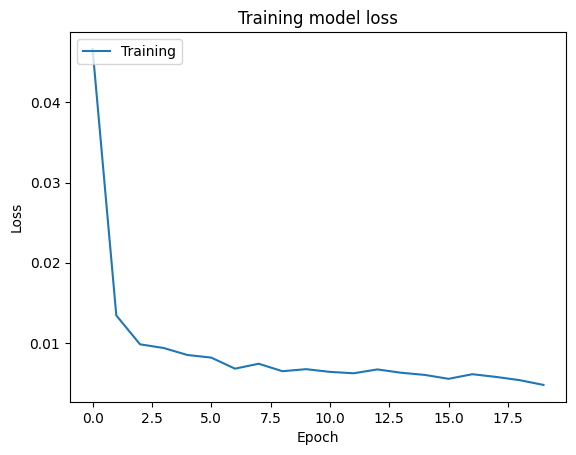

In [9]:
plt.plot(hist.history["loss"])
plt.title("Training model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training"], loc = "upper left")
plt.show()

Testing the model

In [12]:
testData = pd.read_csv("Google_test_data.csv")
testData["Close"] = pd.to_numeric(testData.Close, errors = "coerce")
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60: ,0: ].values
inputClosing = testData.iloc[ : , 0: ].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testData)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test.shape + (1, ))
x_test.shape

TypeError: ignored